In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

warnings.filterwarnings('ignore')

In [2]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


<h4>Displaying the distinct categories of resume and the number of records belonging to each category</h4>

In [3]:
resumeDataSet['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
ETL Developer                40
Blockchain                   40
Mechanical Engineer          40
Sales                        40
Data Science                 40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

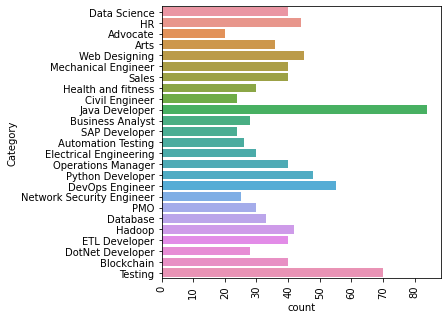

In [4]:
import seaborn as sns

plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

In [5]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

[nltk_data] Downloading package stopwords to /Users/lakpa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lakpa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


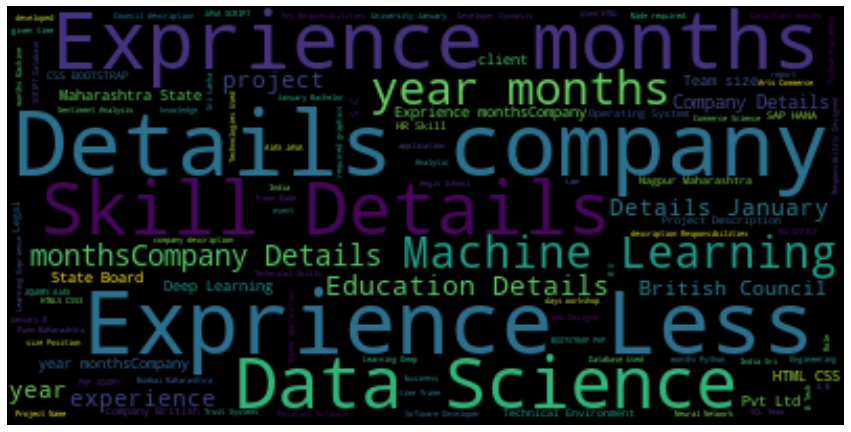

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [9]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

In [10]:
predicted = clf.predict_proba(word_vectorizer.transform(["""
•	To expose myself to new areas, learning and to improve my skills and to collaborate purposefully across boundaries.
•	To join the Banking world to provide better solutions and aspiring CIFC Candidate and to join the customer service role to make the customer’s life at ease.


Current Organization: RBS Services India private Limited (NatWest Group)
Designation: Senior Customer Service & Operations Analyst
Experience: 2 Years 9 Months
Job role: To board the customer into the product/services that they availed and to attend the concerns and queries from various stake holders by following service line agreement. Maintains and records customer’s banking account information in an IT tool.


Department	Roles & Responsibilities
Mortgage Operations	Funds have to be investigated and posting of transactions on the data base systems. KYC and all other documents have to be indexed with the customer account and also to check the affordability.

Financial Crime Operations (Anti- Money Laundering)	Analyst has to look for opportunity to simplify the bank’s process, responding to queries from stakeholders promptly and within our service targets, perform in well fast paced environment and should have presentational skills to deliver to deadline, authorize and investigate transactions, identify red flags, unusual & suspicious pattern in the wire transfer and generate full report on high risk transaction with evidences. Its main objective is to combat money laundering activities, financial crimes occurred using financial institution to avoid reputational damage and fines from regulatory body.



•	Agile Level 1 certified
•	Diploma in RPA (Robotic Process Automation – Ui Path Training)
•	Best volunteer Award for community service
•	Living Our Values (LOV) Award for serving Customers
•	Simplify the Bank (STB) Ideas 7 logged and 1 implemented
•	Spot Ovation for serving Customer & Thinking long Term – 2 times
•	Bronze Ovation for excellent Team work



Degree/Course	Institution/ School	Board/ University	Year of Passing	Percentage
PGDM in Big Data Analytics	Lambton College, Mississauga	Ontario Public College	Currently Pursuing	-
B.Sc. Mathematics  	Loyola College – Autonomous	Madras University	2019	89.80%



•	MS Excel
•	MS word
•	MS PowerPoint



•	Good understanding of risks involved in a role and has the good ability to mitigate it.
•	Good knowledge in banking and also have end to end process knowledge about mortgage journey
•	Good knowledge in customer centric roles and conflicts of interest would be handled in the best interest of the customer.
•	Exhibited leadership quality in Lean tool project.




Days	Monday	Wednesday	Thursday	Friday	Saturday	Sunday
Availability	 From anytime
     Till
5:30 PM	Anytime	Anytime	    From anytime
     Till
5:30 PM	Anytime
	Anytime

"""]))
# le.inverse_transform([4])[0]
predicted[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
import pickle

save_label_encoder = open("pickles/le.pickle","wb")
pickle.dump(le, save_label_encoder)
save_label_encoder.close()

save_word_vectorizer = open("pickles/word_vectorizer.pickle","wb")
pickle.dump(word_vectorizer, save_word_vectorizer)
save_word_vectorizer.close()

save_classifier = open("pickles/clf.pickle","wb")
pickle.dump(clf, save_classifier)
save_classifier.close()

